In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as  sns
import matplotlib.ticker as mtick

__Reading the data file__

In [8]:
df=pd.read_csv("Churn.csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__Undersatanding the data__

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [186]:
df['tenure_range']=pd.cut(df.tenure,[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],right=True)

In [187]:
df['tenure_range'].value_counts()

(0, 5]      1360
(5, 10]      599
(70, 75]     532
(65, 70]     501
(10, 15]     500
(20, 25]     411
(15, 20]     408
(60, 65]     374
(25, 30]     352
(30, 35]     351
(50, 55]     350
(55, 60]     348
(45, 50]     340
(40, 45]     312
(35, 40]     294
Name: tenure_range, dtype: int64

__Visaulization of the data__

<function matplotlib.pyplot.show(*args, **kw)>

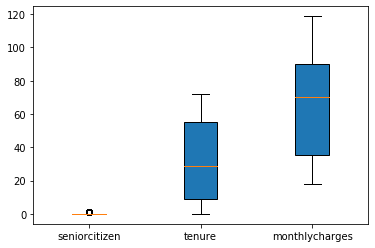

In [13]:
box_list=[df['SeniorCitizen'],df['tenure'],df['MonthlyCharges']]
labels=['seniorcitizen','tenure','monthlycharges']
plt.boxplot(box_list,labels=labels,patch_artist=True)
plt.show

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

__Exploratory data analysis__

_Univariate_

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

__Gender Distribution__

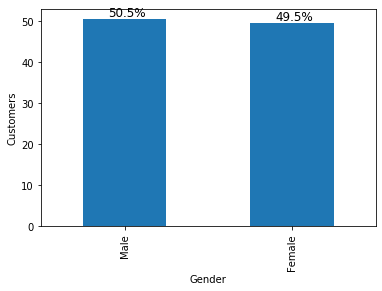

In [58]:
gender_valuecount=(df['gender'].value_counts()*100/len(df)).plot(kind='bar')
gender_valuecount.set_ylabel('Customers')
gender_valuecount.set_xlabel('Gender')
totals = []
for i in gender_valuecount.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in gender_valuecount.patches:
    gender_valuecount.text(i.get_x()+.15, i.get_height()+.66, \
    str(round((i.get_height()/total), 1))+'%',
    fontsize=12,
    color='black')

__Insides : Male coustomers are slightly more than female customers.__

__Distribution of SeniorCitizen__

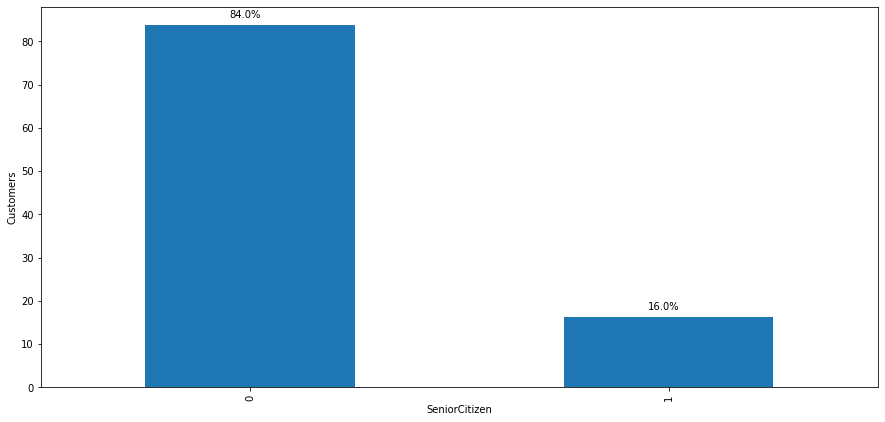

In [87]:
SeniorCitizen_values=(df['SeniorCitizen'].value_counts()*100/len(df)).plot(kind='bar',figsize=(15,7))
SeniorCitizen_values.set_ylabel('Customers')
SeniorCitizen_values.set_xlabel('SeniorCitizen')
totals=[]

for i in SeniorCitizen_values.patches :
    totals.append(i.get_width())
totals=sum(totals)

for i in SeniorCitizen_values.patches:
    SeniorCitizen_values.text(i.get_x()+0.20,i.get_height()+1.75,\
                        str(round((i.get_height()/total)))+'%')

__Insides:  Approximately 16% of seniorcitizen customers are distributed .There are less members of seniorcitizen in  distribution__

___Distribution of Partner___

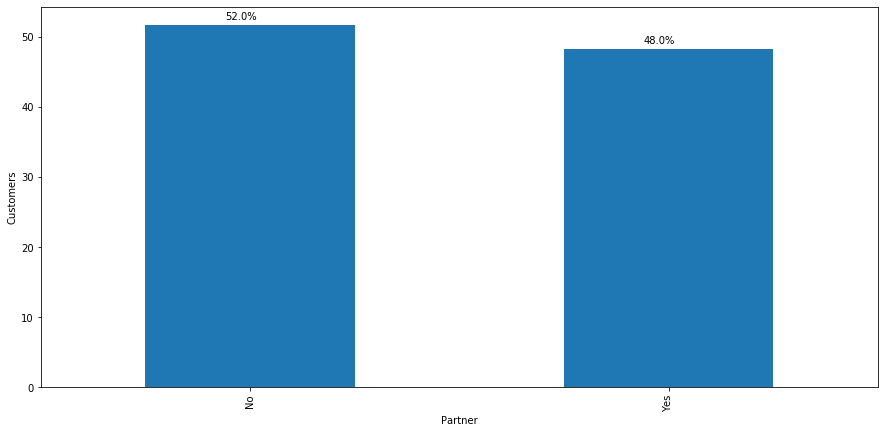

In [119]:
Partner_distribution=(df['Partner'].value_counts()*100/len(df)).plot(kind='bar',figsize=(15,7))
Partner_distribution.set_ylabel('Customers')
Partner_distribution.set_xlabel('Partner')
totals=[]
for i in Partner_distribution.patches:
    totals.append(i.get_width())
totals=sum(totals)

for i in Partner_distribution.patches:
    Partner_distribution.text(i.get_x()+0.19,i.get_height()+0.75,\
                             str(round((i.get_height()/total)))+'%')
    
    

__Insides : 48% of the customers are dependent .52% of customers are not dependent.__

In [123]:
! pip install seaborn

__Bivariate analysis__

__Customers who are seniocitizen and Dependents__

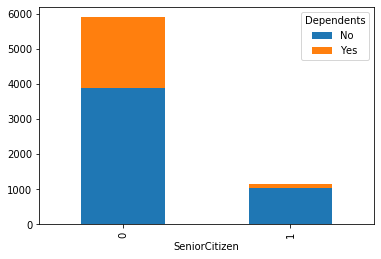

In [162]:
df.groupby(['SeniorCitizen','Dependents']).size().unstack().plot(kind='bar',stacked=True)

    

__Insides : Most of the seniorcitizen customers are  not dependent.Customers who are not senior citizen are dependent when compared senior citizen__

__Customers who are using both phoneservice and internetservice__

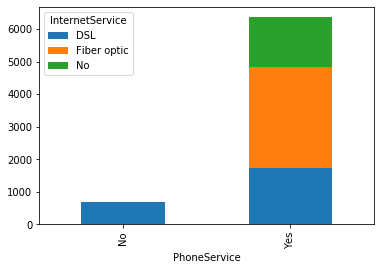

In [176]:
df.groupby(['PhoneService','InternetService']).size().unstack().plot(kind='bar',stacked=True)

__Insides : Most of the customers wh are using fiber optic internet service also using phone service.
    Customers using DSL internet serive are not using phone service.__

__Depending Churn on tenure__

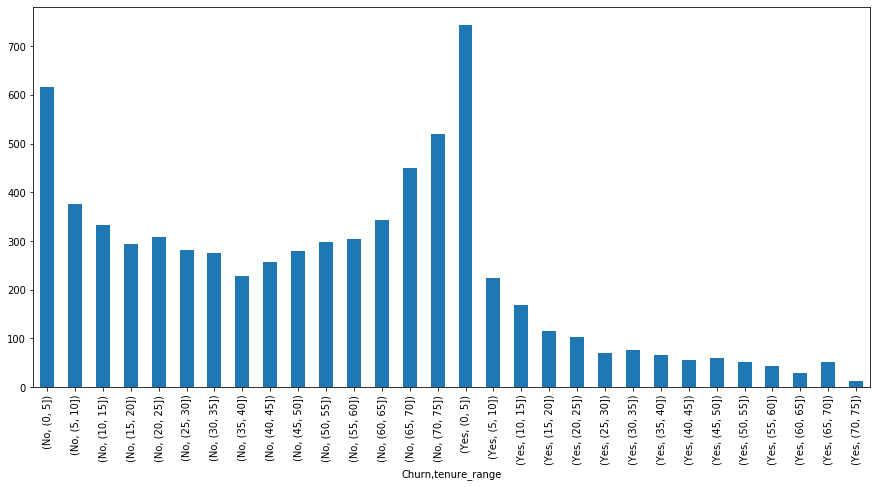

In [194]:
df.groupby(['Churn','tenure_range']).size().plot(kind='bar',figsize=(15,7),stacked=True)

__Insides: Churning rate is high for customers who tenure are ranging in [0,5] ,customers whose tenure range [70,75] there curning rate is low.
Customers who stay long churning will be less, customers who stays for less period churning will be high__

__Customers payment methods__

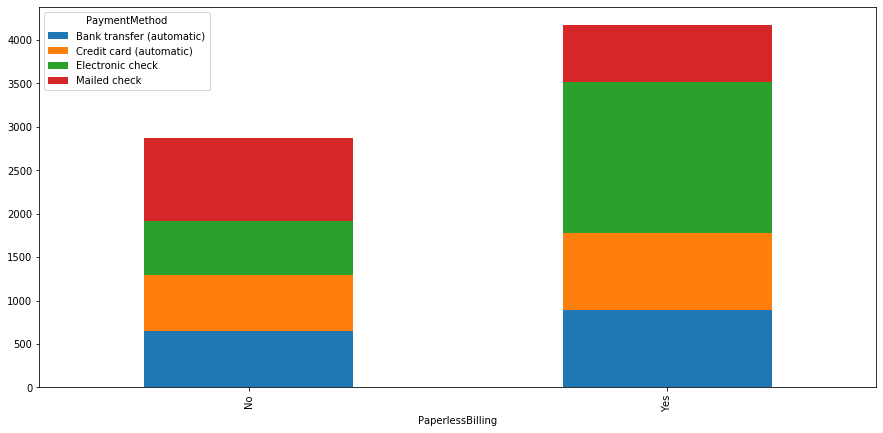

In [196]:
df.groupby(['PaperlessBilling','PaymentMethod']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

__Insides : Customers who are doing paperlessbilling are doing through electronice check then bank transfer,credit card.
    Customers who are not doing paperlessbilling are doing through mailed check and rest of them are using almost in all ways.__

__Distibution of all typs of services__

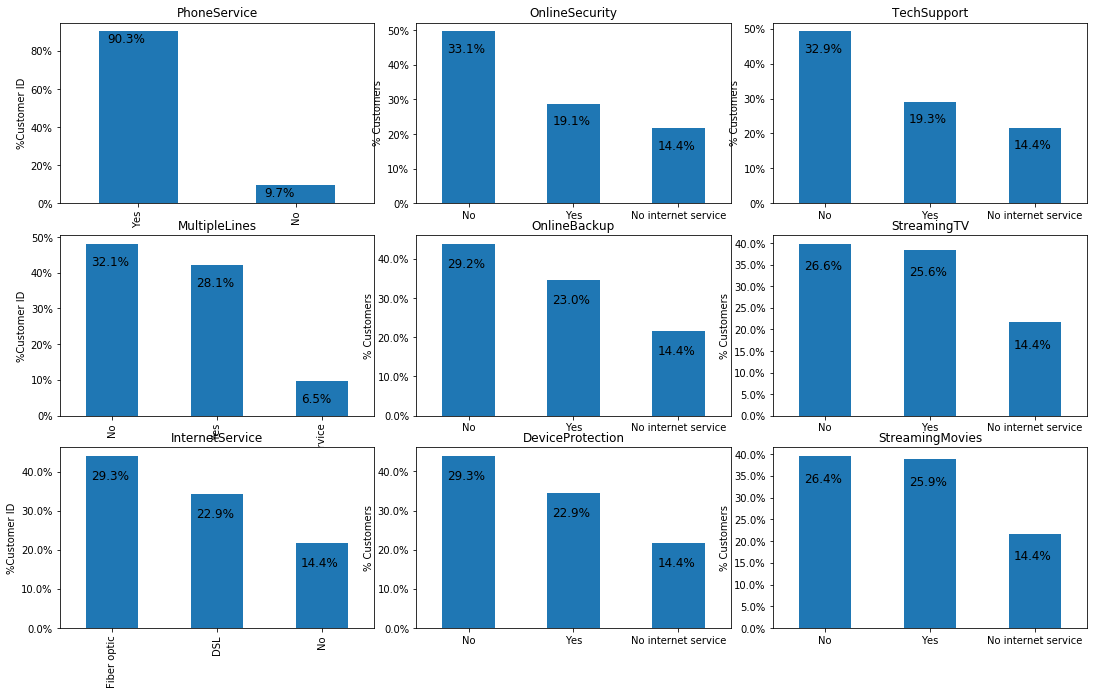

In [199]:
cat_columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
             
             ]
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,9))
fig.tight_layout()
for i ,item in enumerate(cat_columns):
    if i<3:
        ax=(df[item].value_counts()*100/len(df)).plot(kind='bar',ax=axes[i,0])
        ax.set_ylabel('%Customer ID')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals=[]
        for i in ax.patches:
            totals.append(i.get_width())
        total=sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
            
    elif i >=3 and i <6:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    elif i <9:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
     
    ax.set_title(item)
            
        

__Distribution of Churn through different types of services__

In [205]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_range'],
      dtype='object')

In [208]:
df.pivot_table(df, columns=["Churn"], index=['PhoneService','InternetService','OnlineSecurity'])

MonthlyCharges             \
Churn                                                        No        Yes   
PhoneService InternetService OnlineSecurity                                  
No           DSL             No                       39.837403  36.459574   
                             Yes                      47.262598  42.756897   
Yes          DSL             No                       60.291981  53.259223   
                             Yes                      70.648280  62.374096   
             Fiber optic     No                       90.453062  86.759919   
                             Yes                      99.994665  96.445355   
             No              No internet service      21.136058  20.368142   

                                                 SeniorCitizen            \
Churn                                                       No       Yes   
PhoneService InternetService OnlineSecurity                                
No           DSL             No                       0.162791  0.276596   
                             Yes                      0.070866  0.172414   
Yes          DSL             No                       0.097484  0.101942   
                             Yes                      0.072482  0.156627   
             Fiber optic     No                       0.259843  0.311490   
                             Yes                      0.214939  0.251366   
             No              No internet service      0.033263  0.044248   

                                                     tenure             
Churn                                                    No        Yes  
PhoneService InternetService OnlineSecurity                             
No           DSL             No                   30.689922  14.794326  
                             Yes                  43.444882  20.896552  
Yes          DSL             No                   26.850629   8.703883  
                             Yes                  45.398034  24.000000  
             Fiber optic     No                   36.158355  18.153501  
                             Yes                  52.423780  32.633880  
             No              No internet service  32.331210   8.238938

__Insides:
    1.Customers who are using only internetservice(DSL) are around 36$ ,who stays for long period.If they are using both
    InternetService(DSL) and OnlineSecurity monthly costs are around 42$ .
    2.Customers using both PhoneService and InternetService(DSL) monthly charges raised around 53$ .If cutomers 
    uses all three services then monthly charges raises around 62$.
    3.Customers using InternetService(Fiber optic) and PhoneService churning raises around  86$ ,if 
    they uses all three raises around 96$.__

In [211]:
df.pivot_table(df,columns=['Churn'],index=['gender','Dependents'])

MonthlyCharges            SeniorCitizen            \
Churn                         No        Yes            No       Yes   
gender Dependents                                                     
Female No              64.053737  75.397739      0.174970  0.298450   
       Yes             56.997972  72.064848      0.038239  0.054545   
Male   No              62.883656  74.146489      0.177230  0.289987   
       Yes             57.164115  73.687267      0.039088  0.080745   

                      tenure             
Churn                     No        Yes  
gender Dependents                        
Female No          36.058126  16.130491  
       Yes         41.376593  21.103030  
Male   No          35.104460  18.122237  
       Yes         41.332248  22.981366

__Insides : Customers  who have dependents monthly charges are high than compared who are not  dependents__

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [213]:
def heatmap(corr):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(15,7))
    sns.heatmap(corr,annot=True,fmt=".2f")
    plt.xticks([range(len(corr.columns)), corr.columns])
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

TypeError: '<' not supported between instances of 'str' and 'range'

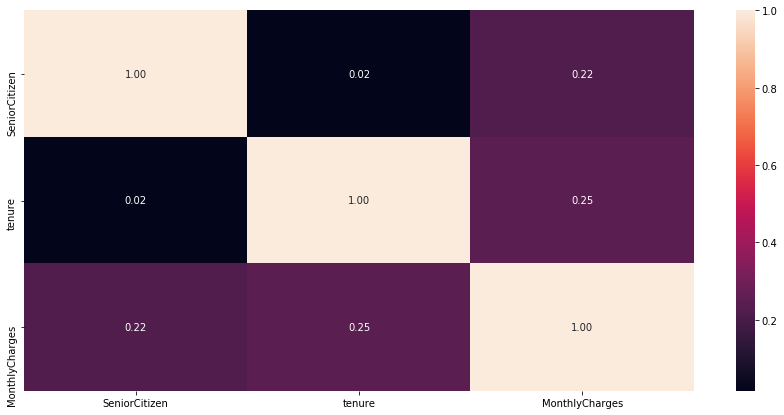

In [214]:
heatmap(df)

__Insides:  Tenure is having high co-relation ,this column can be given to our model for further analysis__

In [215]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [216]:
df['Churn'].unique()
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['Churn'].unique()

array([0, 1], dtype=int64)

In [217]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [218]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [219]:
df['PaperlessBilling'].unique()
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})
df['PaperlessBilling'].unique()

array([1, 0], dtype=int64)

In [220]:
df['PaymentMethod'].unique()
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
       'Credit card (automatic)':3})
df['PaymentMethod'].unique()

array([0, 1, 2, 3], dtype=int64)

In [221]:
df['DeviceProtection'].unique()
df['DeviceProtection']=df['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':2})
df['DeviceProtection'].unique()

array([0, 1, 2], dtype=int64)

In [222]:
df['TechSupport'].unique()
df['TechSupport']=df['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})
df['TechSupport'].unique()

array([0, 1, 2], dtype=int64)

In [223]:
df['StreamingTV'].unique()
df['StreamingTV']=df['StreamingTV'].map({'Yes':1,'No':0,'No internet service':2})
df['StreamingTV'].unique()

array([0, 1, 2], dtype=int64)

In [224]:
df['StreamingMovies'].unique()
df['StreamingMovies']=df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})
df['StreamingMovies'].unique()

array([0, 1, 2], dtype=int64)

In [225]:
df['Contract'].unique()  
df['Contract']=df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df['Contract'].unique()

array([0, 1, 2], dtype=int64)

In [226]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [227]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [228]:
df['gender'].unique()
df['gender']=df['gender'].map({'Male':0,'Female':1})
df['gender'].unique()

array([1, 0], dtype=int64)

In [229]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [230]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [231]:
df['Partner'].unique()


array(['Yes', 'No'], dtype=object)

In [232]:
df['Dependents'].unique()
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1})
df['Dependents'].unique()

array([0, 1], dtype=int64)

In [233]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [234]:
df['PhoneService'].unique()
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1})
df['PhoneService'].unique()

array([0, 1], dtype=int64)

In [235]:
df['MultipleLines'].unique()
df['MultipleLines']=df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})
df['MultipleLines'].unique()

array([2, 0, 1], dtype=int64)

In [236]:
df['InternetService'].unique()
df['InternetService']=df['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
df['InternetService'].unique()

array([0, 1, 2], dtype=int64)

In [237]:
df['OnlineSecurity'].unique()
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
df['OnlineSecurity'].unique()

array([0, 1, 2], dtype=int64)

In [238]:
df['OnlineBackup'].unique()
df['OnlineBackup']=df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':2})
df['OnlineBackup'].unique()

array([1, 0, 2], dtype=int64)

In [239]:
df['Partner']=df['Partner'].map({'Yes':1,'No':0})
df['Partner'].unique()

array([1, 0], dtype=int64)